<center>
<img src="img/itu-logo.jpg"/>
    <h2><b>GEOMATICS ENGINEERING DEPARTMENT</b></h2>
    <h3>GEO 468E: SPECIAL TOPICS IN REMOTE SENSING</b></h3>
    <br><b>INDIVIDUAL HOMEWORK</b>
    <br><b>M. Talha UYSAL - 01017559</b>
</center>

 <b>In this work, a Pleiades-1A image is used.</b>
     
 <img src="img/prev.jpg" style="height:400px;">
     <br>
  <center><h3 style="color:Navy;">Pleiades-1A Bands</h3>
 <table>
  <tr>
    <th>Band</th>
    <th>Wavelength (nanometers)</th>
  </tr>
  <tr>
    <td>P</td>
    <td>430-830</td>
  </tr>
  <tr>
    <td>Blue</td>
    <td>0.45-0.51</td>
  </tr>
  <tr>
    <td>Green</td>
    <td>490-610</td>
  </tr>
    <tr>
    <td>Red</td>
    <td>600-720</td>
  </tr>
  <tr>
    <td>Near Infrared (NIR)</td>
    <td>750-950</td>
  </tr>
    </table>

In [1]:
#import required packages
import numpy as np
import rasterio
import skimage.io as sio
from matplotlib import pyplot as pyp
%matplotlib inline

In [2]:
#a simple function to show images and export them
def preview(img, title):
    fig = pyp.figure(figsize=(5, 5))
    fig.set_facecolor("white")
    pyp.imshow(img)
    pyp.title(title)
    pyp.savefig("output\{}.png".format(title))
    pyp.show()

<h1 style="color:Navy;">Index 1: Green Normalized Difference Index</h1>
<br>The Green Normalized Difference Vegetation Index (GNDVI) is a vegetation index for estimating photo synthetic activity and is a commonly used vegetation index to determine water and nitrogen uptake into the plant canopy.

<table xmlns="http://www.w3.org/1999/xhtml" class="vektor">
    <tr>
      <th>Name
      </th>
      <td>Normalized Difference NIR/Green Green NDVI
      </td>
    </tr>
    <tr>
      <th>Abbreviation
      </th>
      <td>GNDVI
      </td>
    </tr>
    <tr>
      <th>Formula
      </th>
      <td>(NIR - GREEN) / (NIR + GREEN)
        </td>
    </tr>
    <tr>
      <th>Wavelengths
      </th>
      <td>490:570,780:1400
      </td>
    </tr>
  </table>
 <h3 style="color:Navy;">Visualisation of required spectral range</h3>
 <img src="img/gndvi1.png">
 <img src="img/gndvi2.png">

In [3]:
#open the base image
img = sio.imread("img\IMAGE_01.TIF",plugin='tifffile')

#define required bands. (red->img[:,:,0], green->img[:,:,1], blue->img[:,:,2], nir->img[:,:,-1])
green = img[:,:,1]
nir = img[:,:,-1]

In [4]:
#convert the bands to float32 and define the desired index by using its formula
green2 = green.astype(np.float32)
nir2 = nir.astype(np.float32)

gndvi = (nir2-green2) / (nir2+green2)

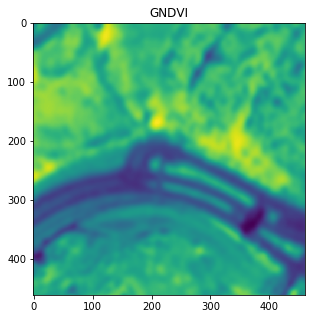

In [5]:
preview(gndvi, "GNDVI")

<h1 style="color:Navy;">Index 2: Simple Ratio NIR/RED Difference Vegetation Index, Vegetation Index Number (VIN)</h1>
<br>This is a quick way to distinguish green leaves from other objects in the scene and estimate the relative biomass present in the image. Also, this value may be very useful in distinguishing stressed vegetation from non-stressed areas.

<table>
    <tr>
      <th>Name
      </th>
      <td>Simple Ratio NIR/RED Difference Vegetation Index, Vegetation Index Number (VIN)
      </td>
    </tr>
    <tr>
      <th>Abbreviation
      </th>
      <td>DVI
      </td>
    </tr>
    <tr>
      <th>Formula
      </th>
      <td>NIR / RED
      </td> 
    </tr>
    <tr>
      <th>Wavelengths
      </th>
      <td>640:760,780:1400
      </td>
    </tr>
        <tr>
      <th>Description
      </th>
      <td>Jordan 1969
      </td>
    </tr>
  </table>
 <h3 style="color:Navy;">Visualisation of required spectral range</h3>
 <img src="img/dvi1.png">
 <img src="img/dvi2.png">

In [6]:
#define required bands. green and nir were already defined before.
red = img[:,:,0]

#convert the bands to float32 and define the desired index by using its formula
red2 = red.astype(np.float32)

dvi = nir2 / red2

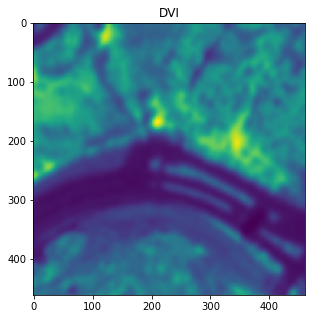

In [7]:
preview(dvi, "DVI")

<h3>References:</h3>
<ul>
<li><a href="https://www.indexdatabase.de/db/i-single.php?id=401">GNDVI - ArcGIS Pro | Documentation</a></li>
<li><a href="https://www.indexdatabase.de/db/i-single.php?id=401">IDB - Index: Normalized Difference NIR/Green Green NDVI</a></li>
<li><a href="https://www.indexdatabase.de/db/i-single.php?id=58">IDB - Index: Simple Ratio NIR/RED Difference Vegetation Index, Vegetation Index Number (VIN)</a></li>
<li><a href="https://en.wikipedia.org/wiki/Enhanced_vegetation_index">Enhanced vegetation index - Wikipedia</a></li>   